<a href="https://colab.research.google.com/github/HafsaHameed457/Heart_Failure_Preditcion/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data = pd.read_csv("/content/heart.csv")
data.head().T


,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [ ]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
maindata = data.drop('HeartDisease',axis = 'columns')
maindata.head().T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [ ]:
#Checking for null values:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Seperating object and data coloumns
objcol = []
numcol = []
for i in data.columns:
    if (data[i].dtype == 'object'):
        objcol.append(i)
    else:
        numcol.append(i)

In [ ]:
objcol

[]

In [ ]:
numcol

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [ ]:
for i in objcol:
    data[i] = le.fit_transform(data[i])
    print(i,le.classes_)

In [ ]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,40.0,49.0,37.0,48.0,54.0,39.0,45.0,54.0,37.0,48.0
Sex,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
ChestPainType,1.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0
RestingBP,140.0,160.0,130.0,138.0,150.0,120.0,130.0,110.0,140.0,120.0
Cholesterol,289.0,180.0,283.0,214.0,195.0,339.0,237.0,208.0,207.0,284.0
FastingBS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RestingECG,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
MaxHR,172.0,156.0,98.0,108.0,122.0,170.0,170.0,142.0,130.0,120.0
ExerciseAngina,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0


<ipython-input-15-15b82f594d19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

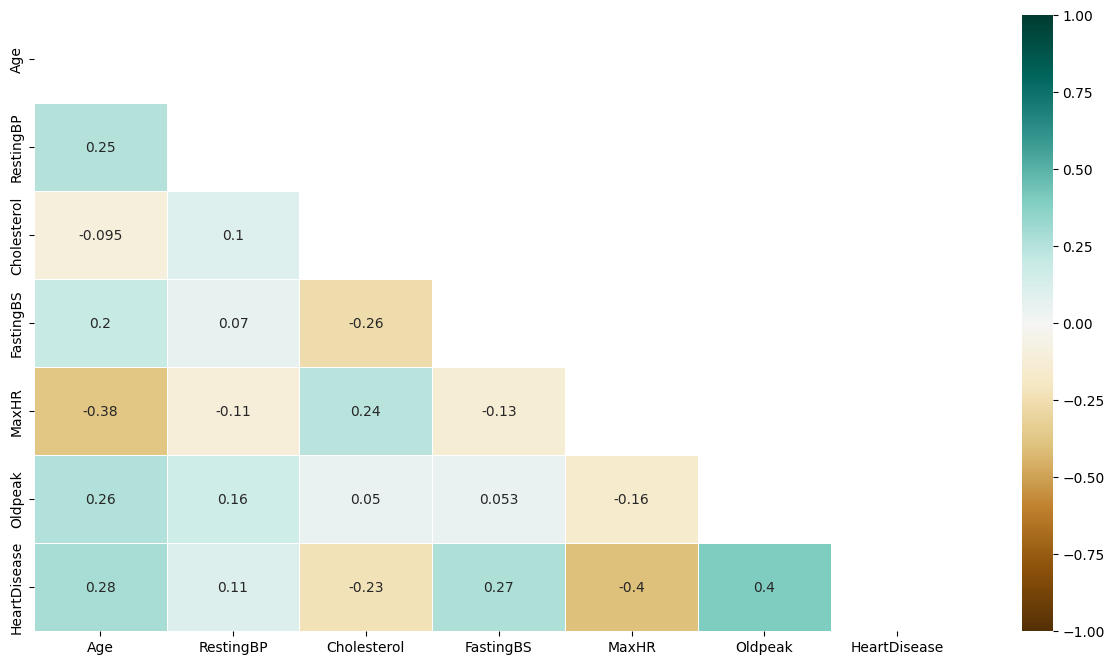

In [ ]:
# Correlation
corr = data.corr()
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(maindata)

ValueError: ignored

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

<ipython-input-16-50e0d763a049>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data.mean()
<ipython-input-16-50e0d763a049>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_devs = data.std()
<ipython-input-16-50e0d763a049>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(np.abs(data - means) > threshold).any(axis=1)]
